In [ ]:
#install.packages('ggplot2')
#install.packages('keras')

#### Import the Fashion MNIST dataset


In [15]:
fashion_mnist <- dataset_fashion_mnist()

c(train_images, train_labels) %<-% fashion_mnist$train
c(test_images, test_labels) %<-% fashion_mnist$test

#### Defining the labels

In [16]:
class_names = c('T-shirt/top',
                'Trouser',
                'Pullover',
                'Dress',
                'Coat', 
                'Sandal',
                'Shirt',
                'Sneaker',
                'Bag',
                'Ankle boot')

#### Explore the data

In [39]:
dim(train_images)
dim(train_labels)

[1] 60000    28    28

[1] 60000

In [41]:
train_labels[1:20]
dim(test_images)
dim(test_labels)

[1] 9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4

[1] 10000    28    28

[1] 10000

#### Preprocess the data

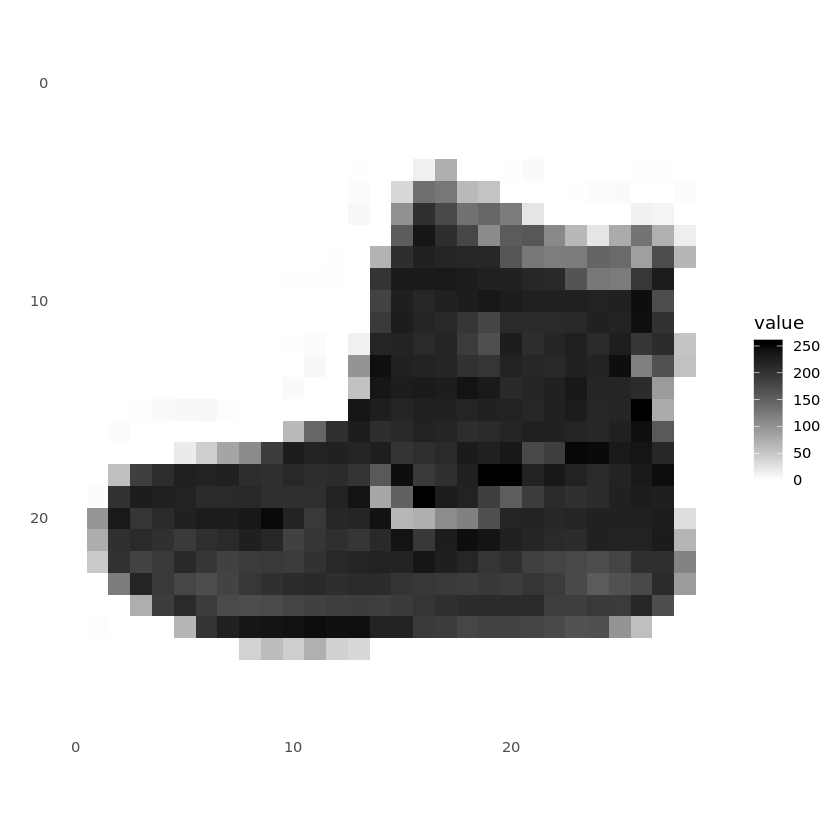

In [22]:
library(tidyr)
library(ggplot2)

image_1 <- as.data.frame(train_images[1, , ])
colnames(image_1) <- seq_len(ncol(image_1))
image_1$y <- seq_len(nrow(image_1))
image_1 <- gather(image_1, "x", "value", -y)
image_1$x <- as.integer(image_1$x)

ggplot(image_1, aes(x = x, y = y, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black", na.value = NA) +
  scale_y_reverse() +
  theme_minimal() +
  theme(panel.grid = element_blank())   +
  theme(aspect.ratio = 1) +
  xlab("") +
  ylab("")

####  We scale the values in a range of 0 to 1 to fit the data we have to divide by 255

In [23]:
train_images <- train_images / 255
test_images <- test_images / 255

#### Display the first 25 images from the training and label above the image

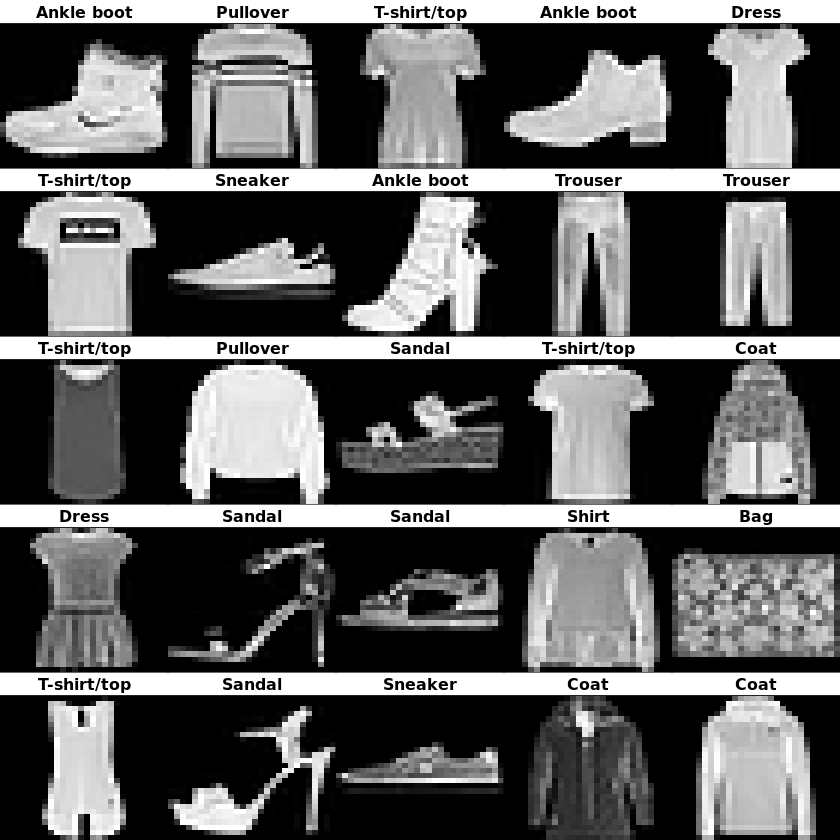

In [24]:
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- train_images[i, , ]
  img <- t(apply(img, 2, rev)) 
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste(class_names[train_labels[i] + 1]))
}

#### Building a Sequentia model

In [25]:
model <- keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 128, activation = 'relu') %>%
  layer_dense(units = 10, activation = 'softmax')

#### Compile the model

In [26]:
model %>% compile(
  optimizer = 'adam', 
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

#### Train the model

In [27]:
model %>% fit(train_images, train_labels, epochs = 5)

#### Evaluate accuracy

In [28]:
score <- model %>% evaluate(test_images, test_labels)

cat('Test loss:', score$loss, "\n")
cat('Test accuracy:', score$acc, "\n")

Test loss: 0.3720435 
Test accuracy: 0.8639 


#### Make predictions

In [46]:
predictions <- model %>% predict(test_images)

#### Take a look a the first prediction

In [47]:
predictions[1, ]

[1] 1.467173e-06 4.239394e-10 1.495428e-07 1.472262e-08 2.927847e-07
 [6] 2.353395e-03 3.650935e-06 1.271867e-02 1.665492e-05 9.849057e-01

A prediction is an array of 10 numbers. Which describe the “confidence” of the model that the image corresponds to each of the 10 different articles of clothing

#### Show label with highest confidence value:

In [31]:
which.max(predictions[1, ])

[1] 10

#### Show the the class prediction:

In [32]:
class_pred <- model %>% predict_classes(test_images)
class_pred[1:20]

[1] 9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0

#### Check the test_labels[1] if our prediction (ankle boot) is correct

In [33]:
test_labels[1]

[1] 9

#### Plot several images with their predictions

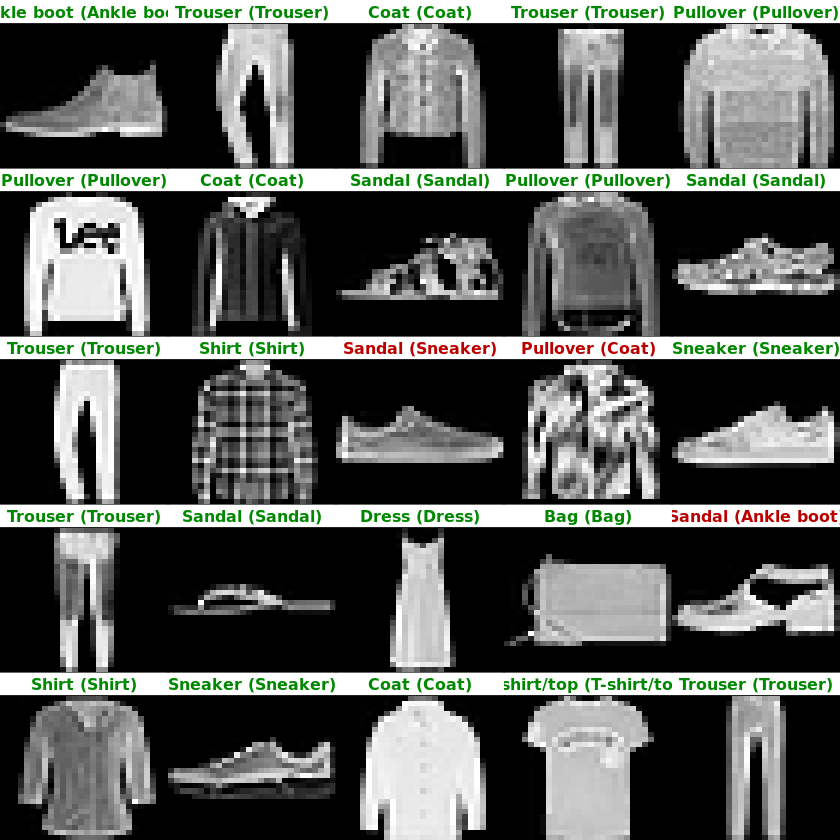

In [34]:
par(mfcol=c(5,5))
par(mar=c(0, 0, 1.5, 0), xaxs='i', yaxs='i')
for (i in 1:25) { 
  img <- test_images[i, , ]
  img <- t(apply(img, 2, rev)) 
  # subtract 1 as labels go from 0 to 9
  predicted_label <- which.max(predictions[i, ]) - 1
  true_label <- test_labels[i]
  if (predicted_label == true_label) {
    color <- '#008800' 
  } else {
    color <- '#bb0000'
  }
  image(1:28, 1:28, img, col = gray((0:255)/255), xaxt = 'n', yaxt = 'n',
        main = paste0(class_names[predicted_label + 1], " (",
                      class_names[true_label + 1], ")"),
        col.main = color)
}

#### Now we are using the trained model to make a prediction about a single image

In [35]:
# Grab an image from the test dataset
# take care to keep the batch dimension, as this is expected by the model
img <- test_images[1, , , drop = FALSE]
dim(img)

[1]  1 28 28

#### Predict the image

In [36]:
predictions <- model %>% predict(img)
predictions

1.467173e-06,4.239402e-10,1.495431e-07,1.472265e-08,2.92785e-07,0.0023534,3.650935e-06,0.01271866,1.665495e-05,0.9849057


#### Grab prediction for our image

In [48]:
# subtract 1 as labels are 0-based
prediction <- predictions[1, ] - 1
which.max(prediction)

[1] 10

#### Show the class prediction 

In [38]:
class_pred <- model %>% predict_classes(img)
class_pred

[1] 9

#### Our model predicts a label of 9 which is an ankle boot